This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

* https://colab.research.google.com/github/ftk1000/deep-learning-with-python-notebooks/blob/master/chapter08_introCNN_VER2.ipynb

* ORIG CHAPTER 8 code from https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Oct  1 04:07:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

In [3]:
%%time
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

CPU times: user 3.3 s, sys: 1.51 s, total: 4.81 s
Wall time: 5.96 s


**Displaying the model's summary**

In [4]:
%%time
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**Training the convnet on MNIST images**

In [5]:
%%time
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 12s 3ms/step - loss: 0.1617 - accuracy: 0.9497
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0464 - accuracy: 0.9856
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0310 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0234 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0188 - accuracy: 0.9941
CPU times: user 21 s, sys: 2.92 s, total: 23.9 s
Wall time: 24.5 s


**Evaluating the convnet**

In [6]:
%%time
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0323 - accuracy: 0.9903
Test accuracy: 0.990
CPU times: user 1.18 s, sys: 162 ms, total: 1.34 s
Wall time: 976 ms


### The convolution operation

#### Understanding border effects and padding

#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [7]:
%%time
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

CPU times: user 45.7 ms, sys: 0 ns, total: 45.7 ms
Wall time: 44.3 ms


In [8]:
%%time
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712202 (2.72 MB)
Trainable params: 712202 (2.

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

In [30]:
!rm -fr ~/.kaggle
!rm * -rf

In [31]:
!ls -altr

total 16
drwxr-xr-x 4 root root 4096 Sep 28 13:26 .config
drwxr-xr-x 1 root root 4096 Oct  1 03:59 ..
drwxr-xr-x 1 root root 4096 Oct  1 04:23 .


In [32]:
%%time
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json
CPU times: user 39.1 ms, sys: 6.79 ms, total: 45.9 ms
Wall time: 5.72 s


{'kaggle.json': b'{"username":"zurman","key":"ef16f63e0ac267b27780b04f0e4a4981"}'}

In [33]:
# !rm -rf *
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Oct  1 04:24 .
drwxr-xr-x 1 root root 4096 Oct  1 03:59 ..
drwxr-xr-x 4 root root 4096 Sep 28 13:26 .config
-rw-r--r-- 1 root root   62 Oct  1 04:24 kaggle.json


In [34]:
%%time
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

CPU times: user 7.87 ms, sys: 2.18 ms, total: 10.1 ms
Wall time: 309 ms


In [35]:
%%time
!kaggle competitions download -c dogs-vs-cats

 98% 799M/812M [00:02<00:00, 300MB/s]
100% 812M/812M [00:02<00:00, 289MB/s]
CPU times: user 54.3 ms, sys: 2.96 ms, total: 57.2 ms
Wall time: 3.93 s


In [36]:
%%time
!unzip -qq dogs-vs-cats.zip

CPU times: user 34.5 ms, sys: 5.99 ms, total: 40.5 ms
Wall time: 5.92 s


In [37]:
%%time
!unzip -qq train.zip

CPU times: user 31.7 ms, sys: 5.4 ms, total: 37.1 ms
Wall time: 5.32 s


In [39]:
!pwd

/content


In [38]:
!ls -la

total 1666376
drwxr-xr-x 1 root root      4096 Oct  1 04:24 .
drwxr-xr-x 1 root root      4096 Oct  1 03:59 ..
drwxr-xr-x 4 root root      4096 Sep 28 13:26 .config
-rw-r--r-- 1 root root 851576689 Dec 11  2019 dogs-vs-cats.zip
-rw-r--r-- 1 root root        62 Oct  1 04:24 kaggle.json
-rw-r--r-- 1 root root     88903 Dec 11  2019 sampleSubmission.csv
-rw-r--r-- 1 root root 284321224 Dec 11  2019 test1.zip
drwxr-xr-x 2 root root    794624 Sep 20  2013 train
-rw-r--r-- 1 root root 569546721 Dec 11  2019 train.zip


**Copying images to training, validation, and test directories**

In [40]:
%%time
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

CPU times: user 171 ms, sys: 336 ms, total: 507 ms
Wall time: 510 ms


### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [88]:
%%time
from tensorflow import keras
from tensorflow.keras import layers

def get_cnn_model():
  inputs = keras.Input(shape=(180, 180, 3))
  x = layers.Rescaling(1./255)(inputs)
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model

CPU times: user 19 µs, sys: 1e+03 ns, total: 20 µs
Wall time: 23.8 µs


In [89]:
%%time
model = get_cnn_model()
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                     

**Configuring the model for training**

In [90]:
%%time
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

CPU times: user 9.56 ms, sys: 36 µs, total: 9.6 ms
Wall time: 8.92 ms


### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [91]:
%%time
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
CPU times: user 252 ms, sys: 74.5 ms, total: 327 ms
Wall time: 282 ms


In [92]:
%%time
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

CPU times: user 2.43 ms, sys: 964 µs, total: 3.39 ms
Wall time: 2.46 ms


In [93]:
%%time
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)
CPU times: user 4.9 ms, sys: 2.76 ms, total: 7.66 ms
Wall time: 6.25 ms


In [94]:
%%time
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)
CPU times: user 7.79 ms, sys: 1.15 ms, total: 8.94 ms
Wall time: 7.14 ms


In [95]:
%%time
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

Cause: could not parse the source code of <function <lambda> at 0x7a787f5b5a20>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7a787f5b5a20>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(4, 4)
(4, 4)
(4, 4)
CPU times: user 23.4 ms, sys: 2.71 ms, total: 26.1 ms
Wall time: 23.5 ms


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [96]:
%%time
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)
CPU times: user 460 ms, sys: 11.7 ms, total: 472 ms
Wall time: 84.6 ms


**Fitting the model using a `Dataset`**

In [97]:
print('this cell does not run')


'''
ValueError                                Traceback (most recent call last)
<timed exec> in <module>

/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py in error_handler(*args, **kwargs)
     68             # To get the full stack trace, call:
     69             # `tf.debugging.disable_traceback_filtering()`
---> 70             raise e.with_traceback(filtered_tb) from None
     71         finally:
     72             del filtered_tb

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_api.py in save_model(model, filepath, overwrite, save_format, **kwargs)
    140                 return
    141         if kwargs:
--> 142             raise ValueError(
    143                 "The following argument(s) are not supported "
    144                 f"with the native Keras format: {list(kwargs.keys())}"

ValueError: The following argument(s) are not supported with the native Keras format: ['options']
'''
a=2
# %%time
# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath="convnet_from_scratch.keras",
#         save_best_only=True,
#         monitor="val_loss")
# ]
# history = model.fit(
#     train_dataset,
#     epochs=30,
#     validation_data=validation_dataset,
#     callbacks=callbacks)

this cell does not run


In [98]:
%%time
# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath="convnet_from_scratch.keras",
#         save_best_only=True,
#         monitor="val_loss")
# ]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    # callbacks=callbacks
    )

Epoch 1/30
63/63 [==============================] - 3s 23ms/step - loss: 0.6942 - accuracy: 0.4985 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 1s 22ms/step - loss: 0.6930 - accuracy: 0.5195 - val_loss: 0.6970 - val_accuracy: 0.5050
Epoch 3/30
63/63 [==============================] - 1s 21ms/step - loss: 0.6820 - accuracy: 0.5905 - val_loss: 0.6425 - val_accuracy: 0.6360
Epoch 4/30
63/63 [==============================] - 1s 21ms/step - loss: 0.6458 - accuracy: 0.6270 - val_loss: 0.6973 - val_accuracy: 0.5790
Epoch 5/30
63/63 [==============================] - 1s 21ms/step - loss: 0.6069 - accuracy: 0.6745 - val_loss: 0.5827 - val_accuracy: 0.6830
Epoch 6/30
63/63 [==============================] - 1s 22ms/step - loss: 0.5699 - accuracy: 0.7215 - val_loss: 0.5850 - val_accuracy: 0.7020
Epoch 7/30
63/63 [==============================] - 1s 22ms/step - loss: 0.5435 - accuracy: 0.7315 - val_loss: 0.5637 - val_accuracy: 0.7120
Epoch 8/30
63

**Displaying curves of loss and accuracy during training**

In [99]:
%%time
def show_plots_val_acc_n_loss(history):
  import matplotlib.pyplot as plt
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(accuracy) + 1)
  plt.plot(epochs, accuracy, "bo", label="Training accuracy")
  plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
  plt.title("Training and validation accuracy")
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.legend()
  plt.show()
  return None

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs


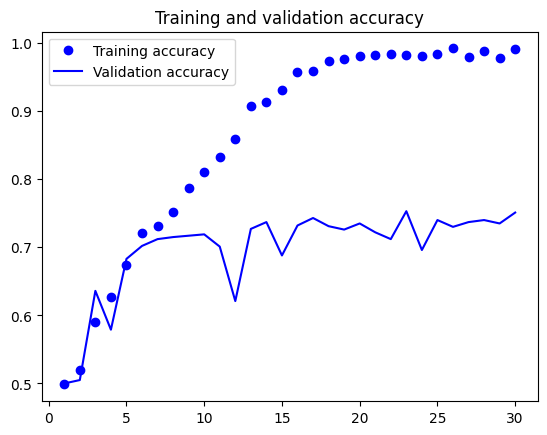

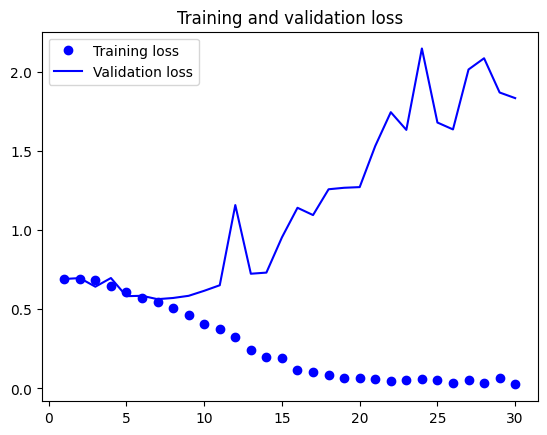

In [100]:
show_plots_val_acc_n_loss(history)

**Evaluating the model on the test set**

In [101]:
# %%time
# test_model = keras.models.load_model("convnet_from_scratch.keras")
# test_loss, test_acc = test_model.evaluate(test_dataset)
# print(f"Test accuracy: {test_acc:.3f}")

## RUN BEST MODEL TRAINED FOR 6 epochs

In [103]:
%%time

m2 = get_cnn_model()
# m2.summary()

m2.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

hist2 = m2.fit(
    train_dataset,
    epochs=6,
    validation_data=validation_dataset,
    verbose=0
    )

CPU times: user 35.7 s, sys: 1.94 s, total: 37.6 s
Wall time: 10 s


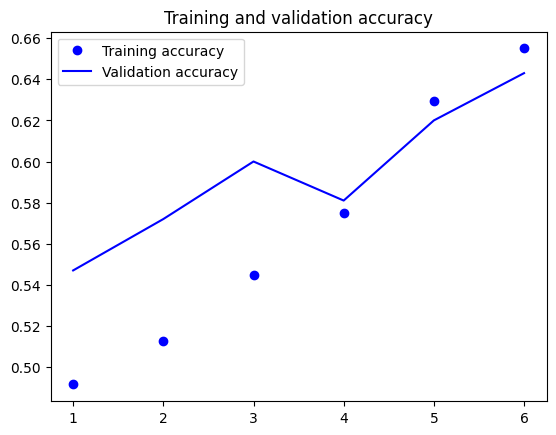

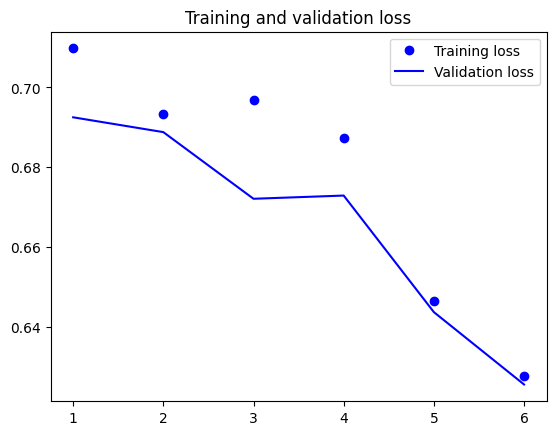

In [104]:
show_plots_val_acc_n_loss(hist2)

In [106]:
# %%time
# test_loss, test_acc = m2.evaluate(test_images, test_labels)
# print(f"Test accuracy: {test_acc:.3f}")

### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [107]:
%%time
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

CPU times: user 9.9 ms, sys: 0 ns, total: 9.9 ms
Wall time: 9.52 ms


**Displaying some randomly augmented training images**

CPU times: user 968 ms, sys: 40.9 ms, total: 1.01 s
Wall time: 647 ms


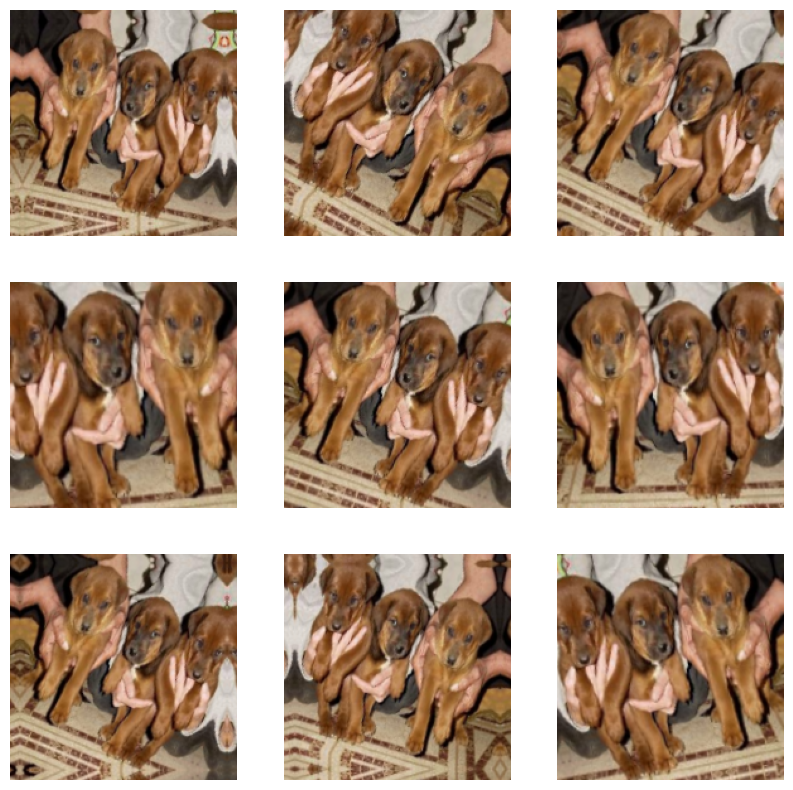

In [108]:
%%time
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [109]:
%%time
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

CPU times: user 654 ms, sys: 2.23 ms, total: 656 ms
Wall time: 653 ms


**Training the regularized convnet**

In [116]:
%%time
# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath="convnet_from_scratch_with_augmentation.keras",
#         save_best_only=True,
#         monitor="val_loss")
# ]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    # callbacks=callbacks
    )

Epoch 1/100
63/63 [==============================] - 2s 24ms/step - loss: 0.3101 - accuracy: 0.8645 - val_loss: 0.4344 - val_accuracy: 0.8220
Epoch 2/100
63/63 [==============================] - 2s 23ms/step - loss: 0.3090 - accuracy: 0.8705 - val_loss: 0.4024 - val_accuracy: 0.8320
Epoch 3/100
63/63 [==============================] - 2s 23ms/step - loss: 0.2867 - accuracy: 0.8805 - val_loss: 0.5731 - val_accuracy: 0.8040
Epoch 4/100
63/63 [==============================] - 2s 23ms/step - loss: 0.2911 - accuracy: 0.8775 - val_loss: 0.4691 - val_accuracy: 0.8130
Epoch 5/100
63/63 [==============================] - 2s 24ms/step - loss: 0.3042 - accuracy: 0.8695 - val_loss: 0.4642 - val_accuracy: 0.8110
Epoch 6/100
63/63 [==============================] - 2s 23ms/step - loss: 0.2764 - accuracy: 0.8785 - val_loss: 0.4179 - val_accuracy: 0.8510
Epoch 7/100
63/63 [==============================] - 2s 23ms/step - loss: 0.2730 - accuracy: 0.8865 - val_loss: 0.5163 - val_accuracy: 0.8250
Epoch 

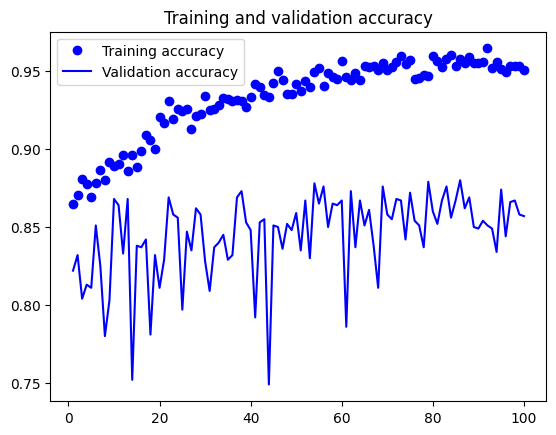

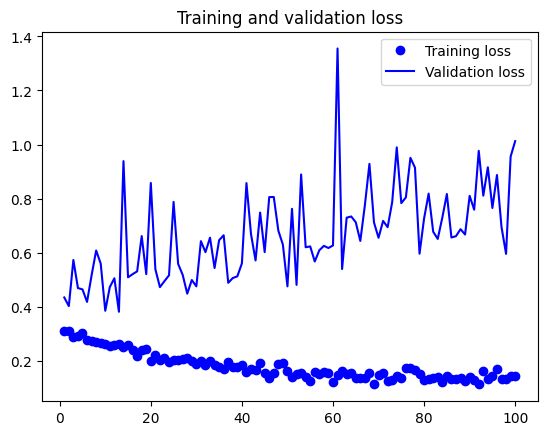

In [117]:
show_plots_val_acc_n_loss(history)

**Evaluating the model on the test set**



In [ ]:
'''
10 epochs accuracy:


63/63 [==============================] - 1s 11ms/step - loss: 0.6049 - accuracy: 0.6675
Test accuracy: 0.668
CPU times: user 3.45 s, sys: 593 ms, total: 4.04 s
Wall time: 795 ms


30 epochs accuracy:
63/63 [==============================] - 1s 9ms/step - loss: 0.5774 - accuracy: 0.7765
Test accuracy: 0.776
CPU times: user 3.5 s, sys: 200 ms, total: 3.7 s
Wall time: 684 ms



100 epochs accuracy:
63/63 [==============================] - 1s 10ms/step - loss: 1.2077 - accuracy: 0.8345
Test accuracy: 0.835
CPU times: user 3.51 s, sys: 141 ms, total: 3.65 s
Wall time: 688 ms
'''


In [118]:
%%time
# test_model = keras.models.load_model(
#     "convnet_from_scratch_with_augmentation.keras")
# test_loss, test_acc = test_model.evaluate(test_dataset)
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 10ms/step - loss: 1.2077 - accuracy: 0.8345
Test accuracy: 0.835
CPU times: user 3.51 s, sys: 141 ms, total: 3.65 s
Wall time: 688 ms


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [119]:
%%time
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step
CPU times: user 458 ms, sys: 175 ms, total: 633 ms
Wall time: 726 ms


In [120]:
%%time
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [121]:
%%time
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 23ms/step
CPU times: user 23.4 s, sys: 1.76 s, total: 25.2 s
Wall time: 16.7 s


In [122]:
%%time
train_features.shape

CPU times: user 10 µs, sys: 1e+03 ns, total: 11 µs
Wall time: 15.5 µs


(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [124]:
%%time
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#       filepath="feature_extraction.keras",
#       save_best_only=True,
#       monitor="val_loss")
# ]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    # callbacks=callbacks
    )

Epoch 1/20
63/63 [==============================] - 1s 7ms/step - loss: 15.7558 - accuracy: 0.9230 - val_loss: 8.7790 - val_accuracy: 0.9570
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 2.8086 - accuracy: 0.9795 - val_loss: 2.9923 - val_accuracy: 0.9740
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 2.2945 - accuracy: 0.9795 - val_loss: 3.6120 - val_accuracy: 0.9760
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 0.6434 - accuracy: 0.9935 - val_loss: 5.3921 - val_accuracy: 0.9670
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 1.1001 - accuracy: 0.9920 - val_loss: 4.7854 - val_accuracy: 0.9730
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.5029 - accuracy: 0.9960 - val_loss: 5.0120 - val_accuracy: 0.9750
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.5166 - accuracy: 0.9925 - val_loss: 4.9485 - val_accuracy: 0.9750
Epoch 8/20
63/63 [=

**Plotting the results**

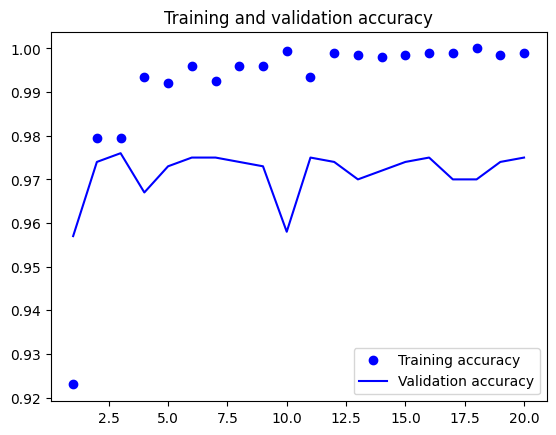

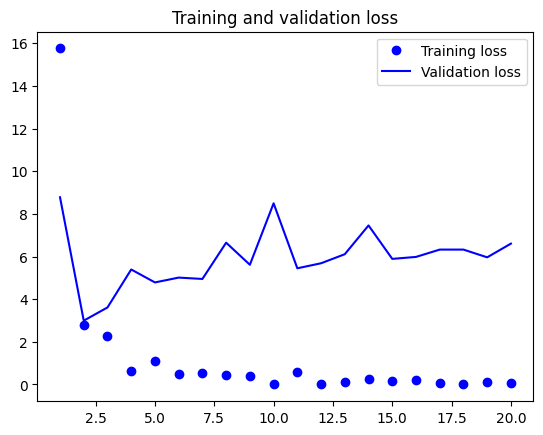

CPU times: user 442 ms, sys: 460 ms, total: 902 ms
Wall time: 409 ms


In [125]:
%%time
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [126]:
%%time
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

CPU times: user 297 ms, sys: 25.6 ms, total: 323 ms
Wall time: 319 ms


**Printing the list of trainable weights before and after freezing**

In [127]:
%%time
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
CPU times: user 1.33 ms, sys: 23 µs, total: 1.36 ms
Wall time: 1.28 ms


In [128]:
%%time
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0
CPU times: user 700 µs, sys: 0 ns, total: 700 µs
Wall time: 700 µs


**Adding a data augmentation stage and a classifier to the convolutional base**

In [129]:
%%time
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

CPU times: user 366 ms, sys: 2.62 ms, total: 369 ms
Wall time: 367 ms


In [131]:
%%time
# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath="feature_extraction_with_data_augmentation.keras",
#         save_best_only=True,
#         monitor="val_loss")
# ]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    # callbacks=callbacks
    )

Epoch 1/50
63/63 [==============================] - 3s 51ms/step - loss: 6.3895 - accuracy: 0.9535 - val_loss: 5.3533 - val_accuracy: 0.9620
Epoch 2/50
63/63 [==============================] - 3s 51ms/step - loss: 6.3916 - accuracy: 0.9575 - val_loss: 3.6376 - val_accuracy: 0.9760
Epoch 3/50
63/63 [==============================] - 3s 51ms/step - loss: 5.1583 - accuracy: 0.9590 - val_loss: 5.2060 - val_accuracy: 0.9690
Epoch 4/50
63/63 [==============================] - 3s 51ms/step - loss: 5.1657 - accuracy: 0.9595 - val_loss: 8.6816 - val_accuracy: 0.9550
Epoch 5/50
63/63 [==============================] - 3s 51ms/step - loss: 4.7350 - accuracy: 0.9610 - val_loss: 7.8578 - val_accuracy: 0.9620
Epoch 6/50
63/63 [==============================] - 3s 51ms/step - loss: 3.2714 - accuracy: 0.9685 - val_loss: 3.6791 - val_accuracy: 0.9780
Epoch 7/50
63/63 [==============================] - 3s 52ms/step - loss: 2.3125 - accuracy: 0.9765 - val_loss: 3.5495 - val_accuracy: 0.9760
Epoch 8/50
63

**Evaluating the model on the test set**

In [132]:
%%time
# test_model = keras.models.load_model(
#     "feature_extraction_with_data_augmentation.keras")
# test_loss, test_acc = test_model.evaluate(test_dataset)
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 32ms/step - loss: 2.5921 - accuracy: 0.9730
Test accuracy: 0.973
CPU times: user 3.77 s, sys: 187 ms, total: 3.96 s
Wall time: 2.11 s


### Fine-tuning a pretrained model

In [ ]:
%%time
conv_base.summary()

**Freezing all layers until the fourth from the last**

In [ ]:
%%time
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
%%time
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
%%time
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

## Summary